In [21]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
best_model = YOLO("runs\\segment\\train3\\weights\\best.pt")

In [23]:
test_path="dataset\\train\\images\\1e4d8b03-Bacterial-Red-disease-6-_jpg.rf.bbb19a416a5d873424a0e0a404e2c4c1.jpg"

In [24]:
results = best_model.predict(source=test_path, show=False, conf=0.4, save=False, verbose=False)

In [25]:
results[0].show()

In [26]:
def health_checker(img_path):

    results = best_model.predict(source=img_path, show=False, conf=0.34, save=False, verbose=False)

    if isinstance(results, list):

        results = results[0]

    orig_img = results.orig_img
    original =cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    if results.masks is not None:

        print("A sick fish is detected.")

        masks = results.masks.data.cpu().numpy()  
                      
        orig_h, orig_w = results.orig_shape[:2]  


        combined_mask = np.zeros((orig_h, orig_w), dtype=np.uint8)  

        for mask in masks:

            resized_mask = cv2.resize(mask, (orig_w, orig_h), interpolation=cv2.INTER_NEAREST)
            combined_mask = np.maximum(combined_mask, resized_mask)  


        mask_colored = np.zeros_like(orig_img, dtype=np.uint8)
        mask_colored[combined_mask > 0] = [0, 255, 0]  


        blended = cv2.addWeighted(orig_img, 0.8, mask_colored, 0.5, 0)
        blended =cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)


        fig, axes = plt.subplots(1, 2, figsize=(10, 6))


        axes[0].axis("off")
        axes[0].imshow(original)

        axes[1].axis("off")
        axes[1].imshow(blended)
        
        plt.show()

    else:
        print("A healthy fish is detected.")
        plt.figure(figsize=(6, 4))
        plt.imshow(original)
        plt.axis("off")
        plt.show()


In [27]:
tesi_image_path="dataset\\train\\images\\1e4d8b03-Bacterial-Red-disease-6-_jpg.rf.bbb19a416a5d873424a0e0a404e2c4c1.jpg"

A sick fish is detected.


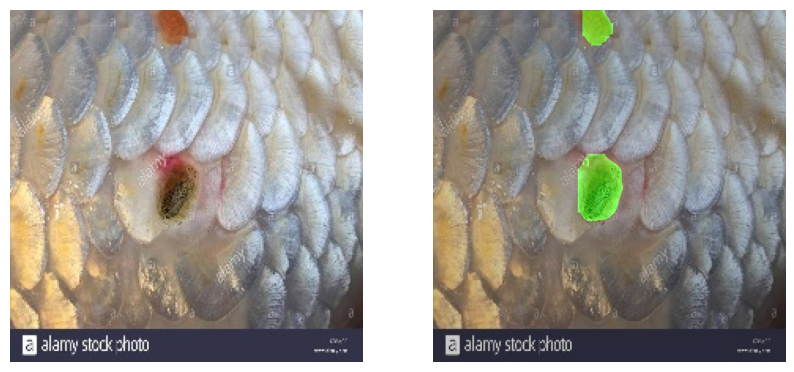

In [28]:
health_checker(tesi_image_path)